# Results for NeuralNetworks using Series of size 20

## Objective

## Steps

## 1. File with information about ICO

In [7]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta
import pickle

In [8]:
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=',')

In [9]:
df_info.head()

,ico,adress,fraud,start_date,market_start_date,diff_days,market_days,size_ok,price,market_cap,o_concur,biggest_holder,exchange,contract,date_analysis,code,site,social_media
0,0X,0xe41d2489571d322189246dafa5ebde1f4699f498,0,2017-08-11,2017-08-15,4,1124,NaN,NaN,45.0,x,2,6,14,2018-02-11,NaN,NaN,NaN
1,0XCERT,0x83e2be8d114f9661221384b3a50d24b96a5653f5,1,2018-06-26,2018-07-11,15,794,x,NaN,NaN,NaN,12,2,0,2019-01-07,x,x,x
2,4NEW,0x241ba672574a78a3a604cdd0a94429a73a84a324,1,2018-08-20,2018-08-20,0,754,x,NaN,NaN,NaN,50,7,0,2019-02-16,x,NaN,NaN
3,ABULABA,0xd938137e6d96c72e4a6085412ada2dad78ff89c4,1,2018-04-19,2018-12-16,241,636,NaN,x,NaN,NaN,13,7,41,2019-06-14,x,NaN,NaN
4,AELF,0xbf2179859fc6d5bee9bf9158632dc51678a4100e,0,2017-12-18,2017-12-21,3,996,NaN,NaN,154.0,x,13,10,0,2018-06-19,NaN,NaN,NaN


## 3. Load data from .py file

In [10]:
with open('dict_arrays_length20.pickle','rb') as pickle_file:
    dict_ico_len_20 = pickle.load(pickle_file) 

In [11]:
dict_ico_len_20.get('arrays')

('array_daily_transactions',
 'array_perc_new_holders',
 'array_biggest_holder',
 'array_newbiers',
 'array_gas_ratio',
 'array_daily_transactions_ma',
 'array_perc_new_holders_ma',
 'array_biggest_holder_ma',
 'array_newbiers_ma',
 'array_gas_ratio_ma')

In [12]:
dict_ico_len_20.pop('arrays')

('array_daily_transactions',
 'array_perc_new_holders',
 'array_biggest_holder',
 'array_newbiers',
 'array_gas_ratio',
 'array_daily_transactions_ma',
 'array_perc_new_holders_ma',
 'array_biggest_holder_ma',
 'array_newbiers_ma',
 'array_gas_ratio_ma')

## 4. Filter data for size equals to 20

In [13]:
dict_perc_transactions = {k:v[0] for k,v in dict_ico_len_20.items() if len(v[0]) == 20}
dict_perc_new_holders = {k:v[1] for k,v in dict_ico_len_20.items() if len(v[1]) == 20}
dict_perc_big_holder = {k:v[2] for k,v in dict_ico_len_20.items() if len(v[2]) == 20}
dict_perc_newbiers = {k:v[3] for k,v in dict_ico_len_20.items() if len(v[3]) == 20}
dict_gas_ratio = {k:v[4] for k,v in dict_ico_len_20.items() if len(v[4]) == 20}
dict_perc_transactions_ma = {k:v[5] for k,v in dict_ico_len_20.items() if len(v[5]) == 20}
dict_perc_new_holders_ma = {k:v[6] for k,v in dict_ico_len_20.items() if len(v[6]) == 20}
dict_perc_big_holder_ma = {k:v[7] for k,v in dict_ico_len_20.items() if len(v[7]) == 20}
dict_perc_newbiers_ma = {k:v[8] for k,v in dict_ico_len_20.items() if len(v[8]) == 20}
dict_gas_ratio_ma = {k:v[9] for k,v in dict_ico_len_20.items() if len(v[9]) == 20}

In [15]:
df_transactions = pd.DataFrame(dict_perc_transactions).T
df_new_holders = pd.DataFrame(dict_perc_new_holders).T
df_big_holder = pd.DataFrame(dict_perc_big_holder).T
df_newbiers = pd.DataFrame(dict_perc_newbiers).T
df_gasratio = pd.DataFrame(dict_gas_ratio).T
df_transactions_ma = pd.DataFrame(dict_perc_transactions_ma).T
df_new_holders_ma = pd.DataFrame(dict_perc_new_holders_ma).T
df_big_holder_ma = pd.DataFrame(dict_perc_big_holder_ma).T
df_newbiers_ma = pd.DataFrame(dict_perc_newbiers_ma).T
df_gasratio_ma = pd.DataFrame(dict_gas_ratio_ma).T

In [18]:
print(df_transactions.shape)
print(df_new_holders.shape)
print(df_big_holder.shape)
print(df_newbiers.shape)
print(df_gasratio.shape)
print(df_transactions_ma.shape)
print(df_new_holders_ma.shape)
print(df_big_holder_ma.shape)
print(df_newbiers.shape)
print(df_gasratio_ma.shape)

(235, 20)
(235, 20)
(235, 20)
(235, 20)
(220, 20)
(235, 20)
(235, 20)
(235, 20)
(235, 20)
(220, 20)


## 5. Dataset for training

### 5.1. Regular Series

In [19]:
df_training_transactions = df_transactions.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_transactions.set_index('ico', inplace=True)

df_training_new_holders = df_new_holders.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_new_holders.set_index('ico', inplace=True)

df_training_big_holder = df_big_holder.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_big_holder.set_index('ico', inplace=True)

df_training_newbiers = df_newbiers.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_newbiers.set_index('ico', inplace=True)

df_training_gasratio = df_gasratio.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_gasratio.set_index('ico', inplace=True)

### 5.2. Moving Average

In [22]:
df_training_transactions_ma = df_transactions_ma.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_transactions_ma.set_index('ico', inplace=True)

df_training_new_holders_ma = df_new_holders_ma.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_new_holders_ma.set_index('ico', inplace=True)

df_training_big_holder_ma = df_big_holder_ma.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_big_holder_ma.set_index('ico', inplace=True)

df_training_newbiers_ma = df_newbiers_ma.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_newbiers_ma.set_index('ico', inplace=True)

df_training_gasratio_ma = df_gasratio_ma.merge(df_info[['ico','fraud']], left_index=True, right_on='ico')
df_training_gasratio_ma.set_index('ico', inplace=True)

In [23]:
print(df_training_transactions_ma.shape)
print(df_training_new_holders_ma.shape)
print(df_training_big_holder_ma.shape)
print(df_training_newbiers_ma.shape)
print(df_training_gasratio_ma.shape)

(235, 21)
(235, 21)
(235, 21)
(235, 21)
(220, 21)


## 5. Training Neuralnets

In [24]:
from ico_parser import ICODeepTraining

### 5.1 Define the model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras

In [31]:
model_mlp = Sequential()
model_mlp.add(Dense(20, input_dim=20, activation='relu'))
model_mlp.add(Dense(30, activation='relu'))
model_mlp.add(Dense(20, activation='relu'))
model_mlp.add(Dense(10, activation='relu'))
model_mlp.add(Dense(1, activation='sigmoid'))

In [32]:
ico_training = ICODeepTraining(df_training_transactions.iloc[:, :-1],
                               df_training_transactions.iloc[:, -1],
                               model_mlp,
                               ann_type='mlp',
                               size_array=20)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 1,891
Trainable params: 1,891
Non-trainable params: 0
_________________________________________________________________


In [33]:
earlystop =  keras.callbacks.EarlyStopping(monitor='loss', patience=50)

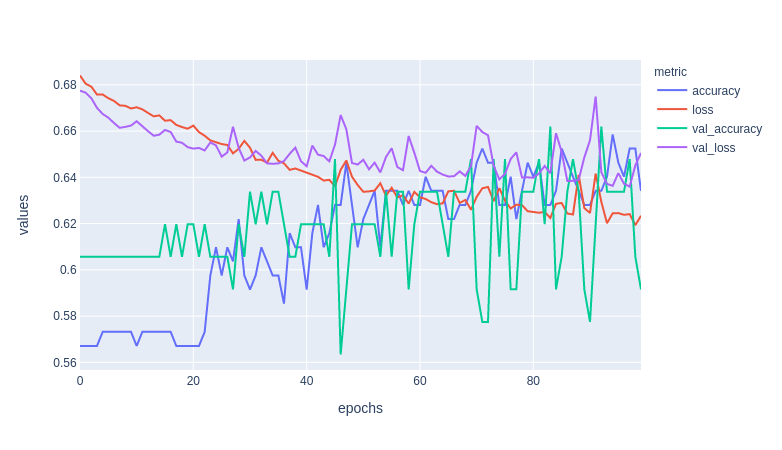

In [35]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=['accuracy'] ,
                      epochs=100,
                      verbose=0, 
                      batch_size=32,
                      callback=earlystop)

ico_training.plot_training()

## CNN
https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [36]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(20, 1)))
model_cnn.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(224, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

In [45]:
ico_training = ICODeepTraining(df_training_transactions.iloc[:, :-1],
                               df_training_transactions.iloc[:, -1],
                               model_cnn,
                               ann_type='cnn',
                               size_array=20)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 18, 8)             32        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 8)             200       
_________________________________________________________________
dropout (Dropout)            (None, 16, 8)             0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 8)              0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 224)               14560     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [46]:
from tensorflow import keras

In [47]:
earlystop =  keras.callbacks.EarlyStopping(monitor='loss', patience=50)

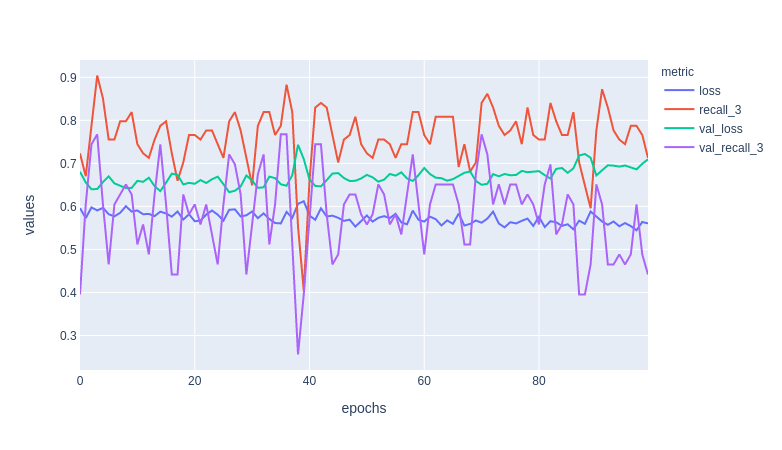

In [48]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=[Recall()] ,
                      epochs=100,
                      verbose=0, 
                      batch_size=32,
                      callback=earlystop)
ico_training.plot_training()

In [42]:
earlystop =  keras.callbacks.EarlyStopping(monitor='loss', patience=6)

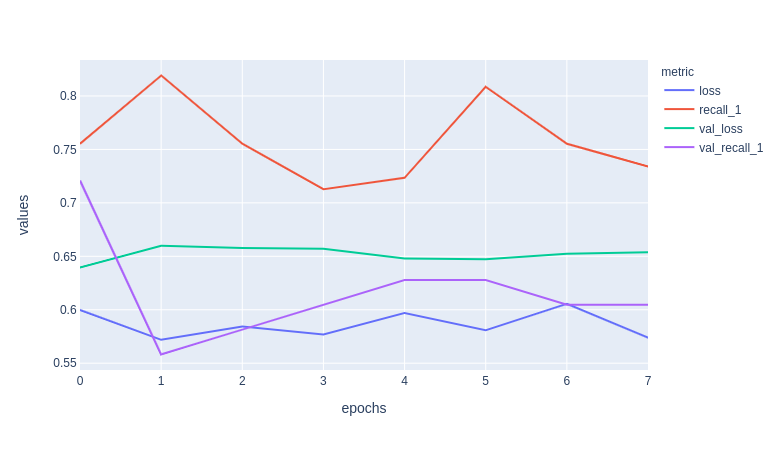

In [43]:
ico_training.train_network(loss='binary_crossentropy', 
                      optimizer='adam',
                      metrics=[Recall()] ,
                      epochs=100,
                      verbose=0, 
                      batch_size=64,
                      callback=earlystop)
ico_training.plot_training()

### LSTM
Based on the following articles:
1. https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
2. https://medium.com/@shivajbd/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e
3. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/

In [29]:
import numpy
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

### Using the framework for LSTM

In [44]:
model_lstm = Sequential()
model_lstm.add(LSTM(100, input_shape=(20, 1), return_sequences=True))
model_lstm.add(Dense(60, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

In [45]:
ico_training = ICODeepTraining(df_training_transactions_20.iloc[:, :-1],
                               df_training_transactions_20.iloc[:, -1],
                               model_lstm,
                               ann_type='lstm',
                               size_array=60)
                               
ico_training.split_train_test()
ico_training.model_summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20, 100)           40800     
_________________________________________________________________
dense_11 (Dense)             (None, 20, 60)            6060      
_________________________________________________________________
dense_12 (Dense)             (None, 20, 1)             61        
Total params: 46,921
Trainable params: 46,921
Non-trainable params: 0
_________________________________________________________________


In [46]:
earlystop =  keras.callbacks.EarlyStopping(monitor='loss', patience=50)

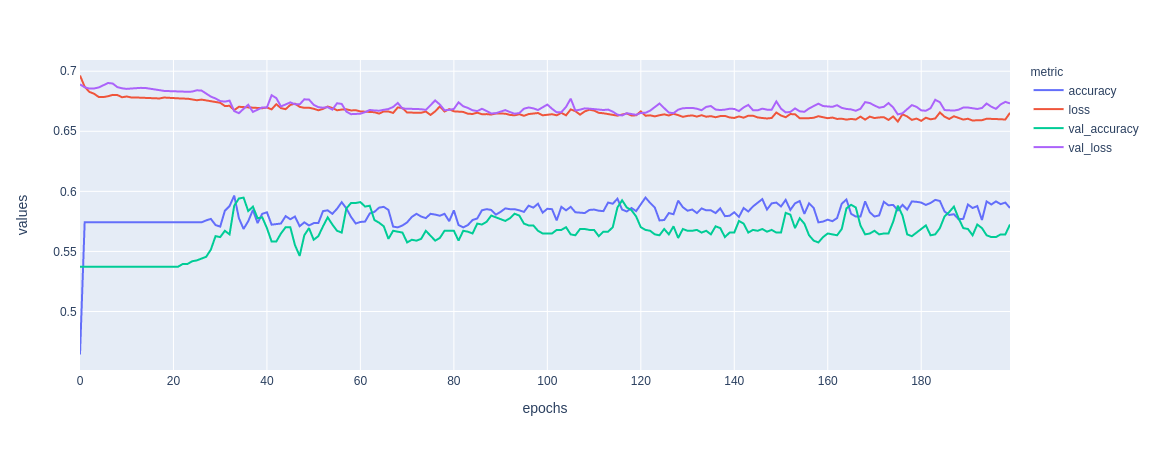

In [47]:
ico_training.train_network(loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],#, Recall()],
        epochs=200,
        verbose=0,
        batch_size=64,
        callback=earlystop)
ico_training.plot_training()